<a href="https://colab.research.google.com/github/BrainConnection/Dynamical_Decoupling_Project/blob/main/Without%20Purcell%20Filter%20(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [1]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 18.8 MB/s eta 0:00:00


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit, minimize

In [3]:
photon_list = np.array([0.0027809028825555213,
 0.0026145547910848515,
 0.0025759084899649558,
 0.0025300857393330913,
 0.0024721860424756076,
 0.002404658267884932,
 0.00232972434542873,
 0.002249191702467065,
 0.00216471175819369,
 0.0020777731073821333,
 0.0019896909924748828,
 0.001901601683921792,
 0.0018144559523372242,
 0.001729025223704284,
 0.0016459137710553046,
 0.0015655757637011499,
 0.0014883345171498746,
 0.0014144023272667757,
 0.0013438996421100558,
 0.0012768726076316098,
 0.0012133087588619728,
 0.001153150513574239,
 0.0010963065902604232,
 0.0010426615050069129,
 0.0009920831410228194,
 0.0009444290470273011,
 0.000899551184805238,
 0.0008572996458893036,
 0.0008175255168309781,
 0.0007800829247872276,
 0.0007448305681687934,
 0.0007116327390442251,
 0.000680359979521634,
 0.0006508894828826867,
 0.0006231052531051273,
 0.0005968981150239936,
 0.0005721656211988016,
 0.0005488118416939651,
 0.0005267470971361585,
 0.0005058877649865623,
 0.00048615582562322506,
 0.0004674786384050148,
 0.0004497885858590055,
 0.00043302276556545405,
 0.00041712266737155734,
 0.0004020336565742253,
 0.00038770559364585124,
 0.0003740911892611879,
 0.0003611466717131576,
 0.00034883132158072583])

Text(0, 0.5, 'Average Photon Number')

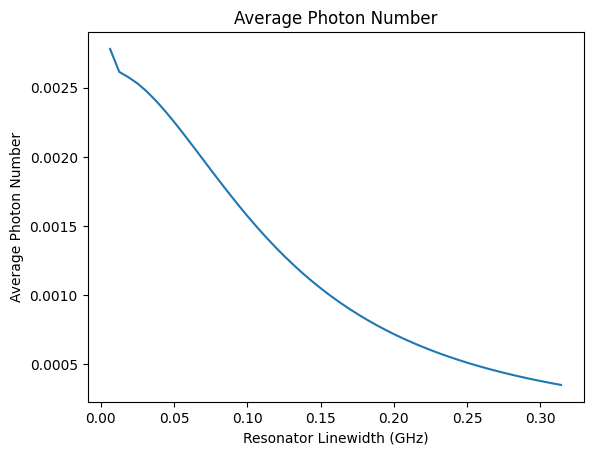

In [4]:
# Plot Results

kappa_list = np.array([2 * np.pi * 0.001 * (i+1) for i in range(50)])
plt.plot(kappa_list, photon_list)

plt.title('Average Photon Number')
plt.xlabel('Resonator Linewidth (GHz)')
plt.ylabel('Average Photon Number')

# CP CPMG UDD XY4 XY8 XY16 Sequence

In [5]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    [[   7.56379775,   19.18454147,   30.81580265,   42.43623895], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq

In [6]:
# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

## CP CPMG UDD Sequence

In [7]:
# CP (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CP_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0)

    return pulse

In [8]:
# CPMG (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CPMG_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0.5*np.pi)

    return pulse

## XY4 XY8 XY16 Sequence

In [9]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 4)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [10]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame_op1(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']
    kappa = args['kappa']

    # T_cent
    Seq = Pulse_Timing_op1(T_srt, T_end, 4, kappa)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [11]:
# XY8 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY8_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 8)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 1.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 1.0*np.pi)

    return pulse

In [12]:
# XY16 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY16_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 16)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 0)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[8], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[9], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[10], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[11], 1.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[12], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[13], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[14], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[15], np.pi)

    return pulse

# Sequence Optimization Cost Function 1

## Setting

In [13]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [14]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [15]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    Tot_Seq = [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    Tot_Seq = [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    Tot_Seq = [[   7.56379775,   19.18454147,   30,   40], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq

In [16]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Func1 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func1_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    Time_Seq = Pulse_Timing(0, T, N)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


# Func2 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func2_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    kappa = args['kappa']
    Time_Seq = Pulse_Timing_op1(0, T, N, kappa)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


def cost_func1(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func1_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def cost_func2(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func2_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func1(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Optimization

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.8461348297889647

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[-0.27801082  1.98407361  5.75546383  3.1340806 ]
0.8455967479681041

[-0.27801082  1.98

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8682237440344841
       x: [ 6.817e-01  2.610e+00  5.440e+00  2.453e+00]
    nfev: 81
   maxcv: 0.0

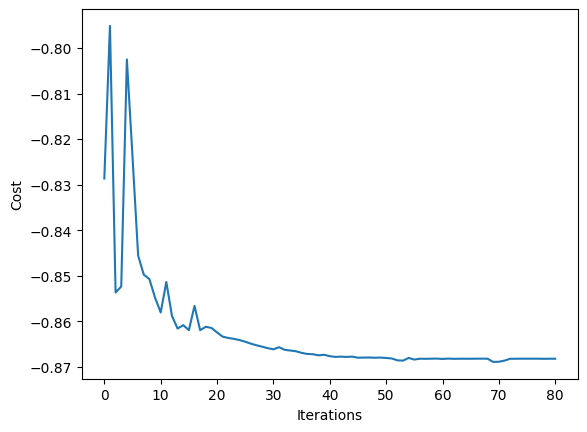

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [17]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 150
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.7559778862277056

[1.         1.57079633 4.71238898 3.14159265]
0.7397258279097756

[1.         1.57079633 4.71238898 3.14159265]
0.7397258279097756

[0.         2.57079633 4.71238898 3.14159265]
0.7064864288637673

[0.         2.57079633 4.71238898 3.14159265]
0.7064864288637673

[0.         1.57079633 5.71238898 3.14159265]
0.762906321595945

[0.         1.57079633 5.71238898 3.14159265]
0.762906321595945

[0.         1.57079633 5.71238898 4.14159265]
0.7613382774076308

[0.         1.57079633 5.71238898 4.14159265]
0.7613382774076308

[-0.30912896  0.62942372  5.84417413  3.11176702]
0.7116814740838613

[-0.30912896  0.62942372  5.84417413  3.11176702]
0.7116814740838613

[0.49398884 1.49428216 5.72310039 3.13916845]
0.7329457967499781

[0.49398884 1.49428216 5.72310039 3.13916845]
0.7329457967499781

[-0.28373981  1.98048721  5.75194836  3.13263957]
0.7570721138998894

[-0.28373981  1.9804

In [18]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.7753872874862416
       x: [ 4.321e-01  2.188e+00  5.531e+00  3.043e+00]
    nfev: 55
   maxcv: 0.0

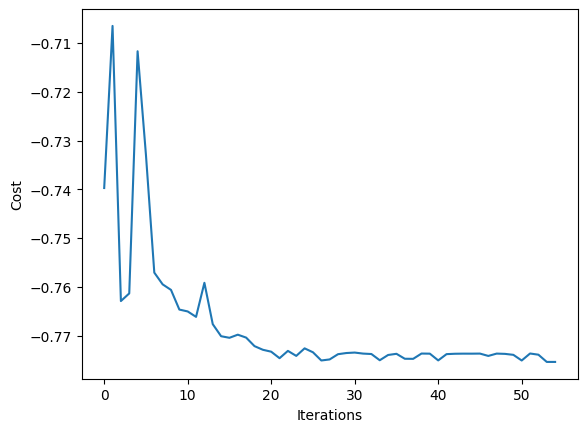

In [19]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [20]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.6761527857193417

[1.         1.57079633 4.71238898 3.14159265]
0.6592022954434203

[1.         1.57079633 4.71238898 3.14159265]
0.6592022954434203

[0.         2.57079633 4.71238898 3.14159265]
0.6274183773160651

[0.         2.57079633 4.71238898 3.14159265]
0.6274183773160651

[0.         1.57079633 5.71238898 3.14159265]
0.6830225448021452

[0.         1.57079633 5.71238898 3.14159265]
0.6830225448021452

[0.         1.57079633 5.71238898 4.14159265]
0.6822576124364991

[0.         1.57079633 5.71238898 4.14159265]
0.6822576124364991

[-0.32560148  0.63465848  5.84434998  3.12689909]
0.6348653874274001

[-0.32560148  0.63465848  5.84434998  3.12689909]
0.6348653874274001

[0.49298946 1.48818812 5.7240337  3.14029604]
0.6528846071356688

[0.49298946 1.48818812 5.7240337  3.14029604]
0.6528846071356688

[-0.28909     1.97675849  5.75241189  3.13713619]
0.6760719493781578

[-0.28909     1.97

In [21]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6915268724357861
       x: [ 3.356e-01  1.959e+00  5.367e+00  2.759e+00]
    nfev: 57
   maxcv: 0.0

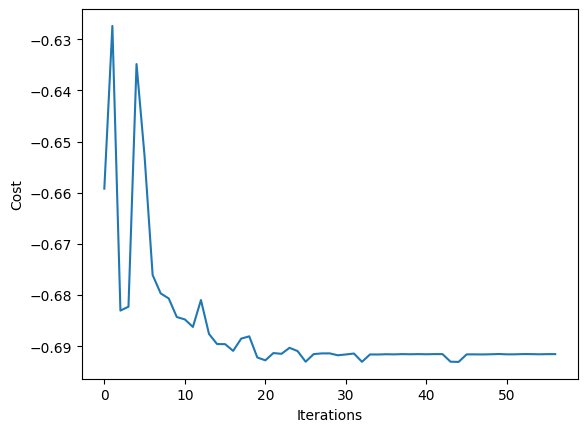

In [22]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [23]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 250
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.6025411582994721

[1.         1.57079633 4.71238898 3.14159265]
0.5880973899125878

[1.         1.57079633 4.71238898 3.14159265]
0.5880973899125878

[0.         2.57079633 4.71238898 3.14159265]
0.5551050262583372

[0.         2.57079633 4.71238898 3.14159265]
0.5551050262583372

[0.         1.57079633 5.71238898 3.14159265]
0.610174396293797

[0.         1.57079633 5.71238898 3.14159265]
0.610174396293797

[0.         1.57079633 5.71238898 4.14159265]
0.6090762869599148

[0.         1.57079633 5.71238898 4.14159265]
0.6090762869599148

[-0.28782493  0.62552354  5.8644986   3.11971033]
0.5588447981449628

[-0.28782493  0.62552354  5.8644986   3.11971033]
0.5588447981449628

[0.49502819 1.50137223 5.72356044 3.13998554]
0.5802255537630173

[0.49502819 1.50137223 5.72356044 3.13998554]
0.5802255537630173

[-0.28950994  1.97606929  5.75596115  3.13532441]
0.6048853304468857

[-0.28950994  1.9760

In [24]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6186118800605431
       x: [ 3.120e-01  2.016e+00  5.507e+00  3.024e+00]
    nfev: 77
   maxcv: 0.0

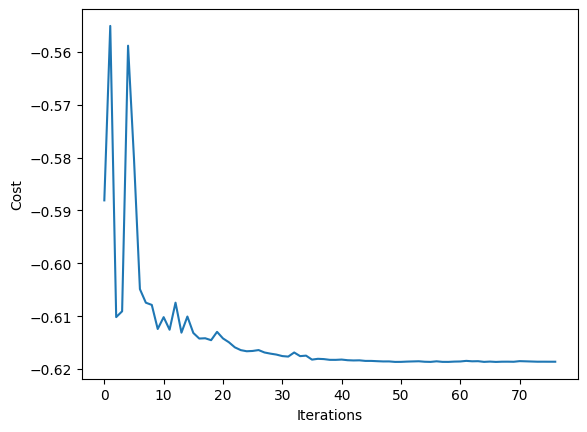

In [25]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [26]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 300
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.5369115073825816



KeyboardInterrupt: 

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 350
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 400
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 450
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 500
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Sequence Optimization Cost Function 2

## Setting

In [ ]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [ ]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [ ]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    Tot_Seq = [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    Tot_Seq = [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    Tot_Seq = [[   7.56379775,   19.18454147,   30,   40], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq

In [ ]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Func1 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func1_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    Time_Seq = Pulse_Timing(0, T, N)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


# Func2 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func2_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    kappa = args['kappa']
    Time_Seq = Pulse_Timing_op1(0, T, N, kappa)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


def cost_func1(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func1_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def cost_func2(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func2_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func2(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Optimization

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func2,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.8461348297889647

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[-0.27801082  1.98407361  5.75546383  3.1340806 ]
0.8455967479681041

[-0.27801082  1.98

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8682237440344841
       x: [ 6.817e-01  2.610e+00  5.440e+00  2.453e+00]
    nfev: 81
   maxcv: 0.0

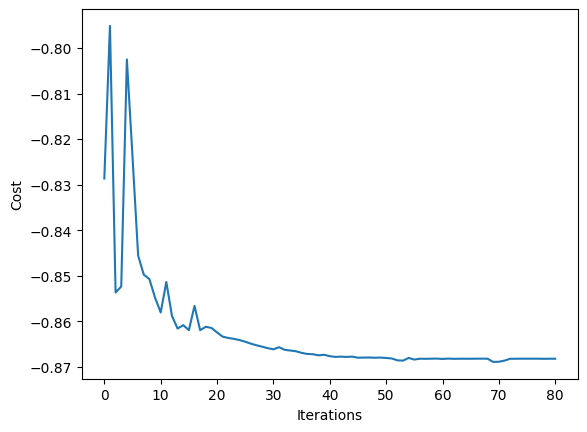

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 150
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.7559778862277056

[1.         1.57079633 4.71238898 3.14159265]
0.7397258279097756

[1.         1.57079633 4.71238898 3.14159265]
0.7397258279097756

[0.         2.57079633 4.71238898 3.14159265]
0.7064864288637673

[0.         2.57079633 4.71238898 3.14159265]
0.7064864288637673

[0.         1.57079633 5.71238898 3.14159265]
0.762906321595945

[0.         1.57079633 5.71238898 3.14159265]
0.762906321595945



In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 250
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 300
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 350
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 400
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 450
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 500
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()